In [1]:
library(Seurat)
library(ggplot2)
library(openxlsx)
library(readxl)
library(dplyr)
library(RColorBrewer)
library(harmony)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




ERROR: Error in library(openxlsx): there is no package called ‘openxlsx’


In [3]:
setwd("/dh-projects/ag-conrad/analysis/said-lorenz/transfer/saal11/panfib/Datasets_final")

ERROR: Error in setwd("/dh-projects/ag-conrad/analysis/said-lorenz/transfer/saal11/panfib/Datasets_final"): cannot change working directory


In [ ]:
#Load datasets to integrate

In [3]:
load("data_deng_harm_updated.RData")

In [4]:
table(data_deng_seurat$lineage)


  Epi   Imm Mesen   Neu  Unkn 
 6713  1086 32255   242   359 

In [5]:
load("data_adam_harm_updated_reint_ann.RData")

In [6]:
table(data_adams_seurat$lineage)


 Mesen    Epi    Imm 
 13182  17751 208772 

In [7]:
load("data_fons_harm_updated_int_ann.RData")

In [8]:
table(data_fons$lineage)


  Mesen     Epi     Imm Mitotic 
 227832    6542  106270    2024 

In [9]:
load("data_haber_harm_updated-Copy1.RData")

In [10]:
table(data_haber_seurat$lineage)


Mesen   Epi   Imm 
15678 37325 61393 

In [11]:
load("data_kuppe_harm_updated_int_ann.RData")

In [12]:
table(data_kuppe_seurat$lineage)


Mesen   Epi   Imm 
60231 42867 16821 

In [55]:
load("data_panc_harm_updated_int_ann.RData")

In [14]:
table(data_panc$lineage)


   Epi    Imm  Mesen    Neu 
234020   2853  10281   3661 

In [15]:
load("data_rama_harm_updated_int_ann.RData")

In [16]:
table(data_rama_seurat$lineage)


  Mesen     Epi     Imm Mitotic 
  10244    3690   43615     809 

In [18]:
load("data_reyf_harm_updated_ann.RData")

In [19]:
table(data_reyf_seurat$lineage)


  Epi   Imm Mesen 
26656 29061  1978 

In [ ]:
#Integration

In [30]:
#Merge datasets
merged <- merge(data_adams_seurat, c(data_deng_seurat, data_fons, data_haber_seurat,
                                    data_kuppe_seurat, data_panc, data_rama_seurat, data_reyf_seurat))

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Centering and scaling data matrix

PC_ 1 
Positive:  CALD1, IGFBP7, DCN, MGP, COL1A2, COL6A2, IGFBP4, COL1A1, LUM, C1R 
	   COL3A1, SPARC, SPARCL1, C1S, COL6A1, RARRES2, FBLN1, FSTL1, CCDC80, IGFBP5 
	   AEBP1, TPM1, PCOLCE, COL6A3, TIMP3, SERPINF1, TPM2, EGR1, MYL9, CAVIN1 
Negative:  TYROBP, FCER1G, LAPTM5, HLA-DRA, AIF1, CTSS, SPI1, C1QA, C1orf162, SLC11A1 
	   OLR1, HLA-DPB1, HLA-DRB1, CD74, C

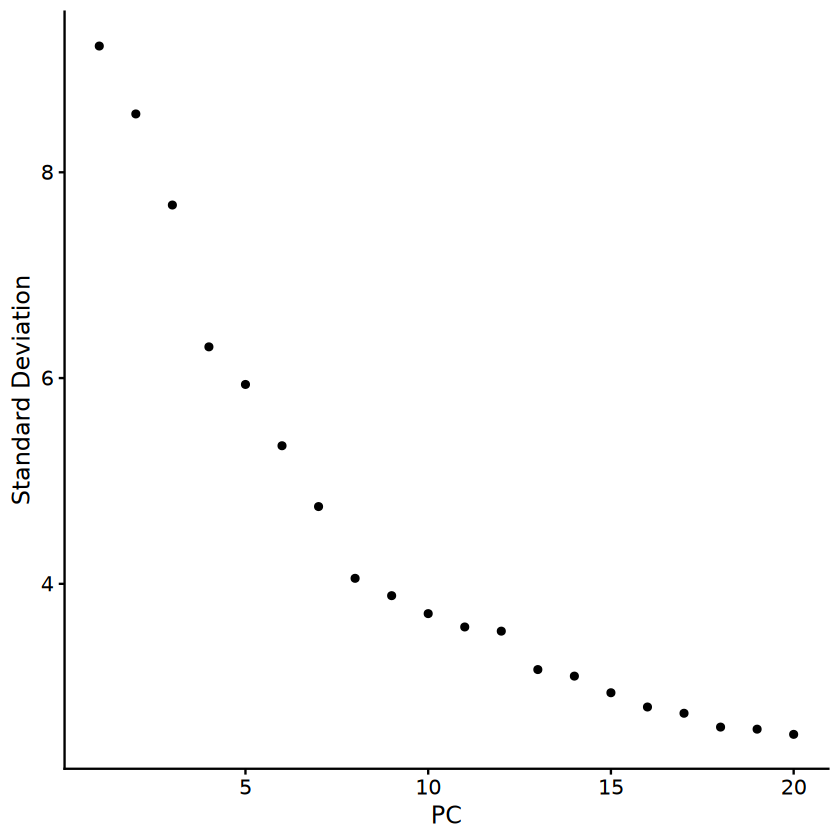

In [31]:
#PCAs
options(future.globals.maxSize = 8000 * 1024^2)
merged <- NormalizeData(merged)
merged <- FindVariableFeatures(merged)
merged <- ScaleData(merged)
merged <- RunPCA(merged)
ElbowPlot(merged)

In [32]:
merged@active.ident <- as.factor(merged$study)

In [35]:
#Harmony integration - timed
start.time <- Sys.time()


merged <- RunHarmony(merged, 
                        group.by.vars = "study",
                        reduction = "pca",
                        verbose = TRUE,
                        reduction.save = "harmony",
                        assay.use = "RNA")

result <- sum(1:10000)

end.time <- Sys.time()
time.taken <- round(end.time - start.time,2)
time.taken

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 61210550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 61210550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 61210550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 61210550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 61210550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 61210550)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 61210550)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony converged after 7 iterations



Time difference of 25.6 mins

In [36]:
table(merged$study)

An object of class Seurat 
75626 features across 1224211 samples within 1 assay 
Active assay: RNA (75626 features, 2000 variable features)
 22 layers present: data.1, data.3, data.5, data.6, data.7, counts.1, scale.data.1, counts.2, counts.3, scale.data.3, counts.4, counts.5, scale.data.5, counts.6, scale.data.6, counts.7, scale.data.7, counts.8, data.2, data.4, data.8, scale.data
 2 dimensional reductions calculated: pca, harmony

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1224211
Number of edges: 30494834

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9692
Number of communities: 53
Elapsed time: 1581 seconds


35 singletons identified. 18 final clusters.

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:06:30 UMAP embedding parameters a = 0.9922 b = 1.112

16:06:30 Read 1224211 rows and found 20 numeric columns

16:06:30 Using Annoy for neighbor search, n_neighbors = 30

16:06:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:08:53 Writing NN index file to temp file /tmp/Rtmp2wB54r/filed618141416621

16:08:53 Searching Annoy index using 1 thread, search_k = 3000

16:19:12 Annoy recall = 100%

16:19:15 Commencing smooth kNN distance cal

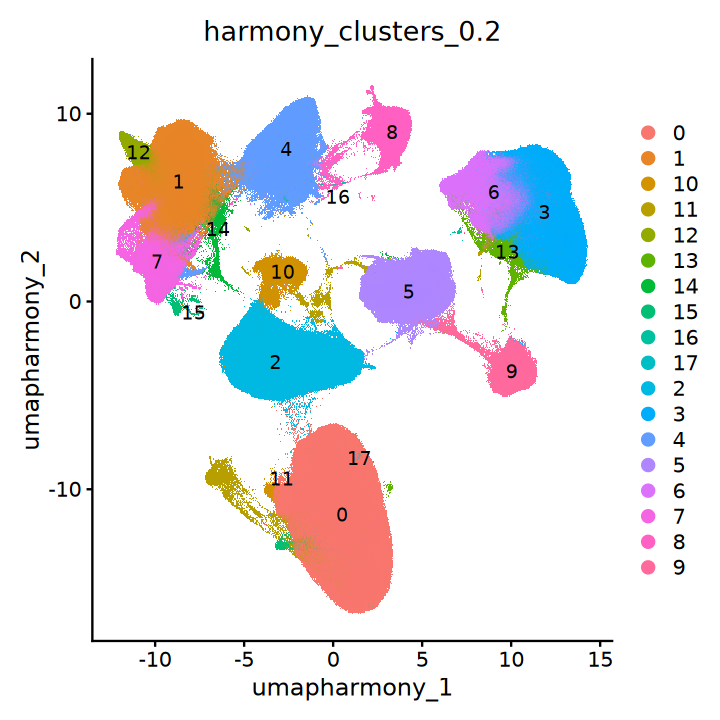

In [39]:
merged <- FindNeighbors(merged, reduction = "harmony", dims = 1:20)
merged <- FindClusters(merged, resolution = 0.2, cluster.name = "harmony_clusters_0.2")
merged <- RunUMAP(merged, reduction = "harmony", dims = 1:20, reduction.name = "umap.harmony")

options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(merged, label = T, group.by = "harmony_clusters_0.2")

In [ ]:
#Identify epithelial, mesenchymal, and immune cells

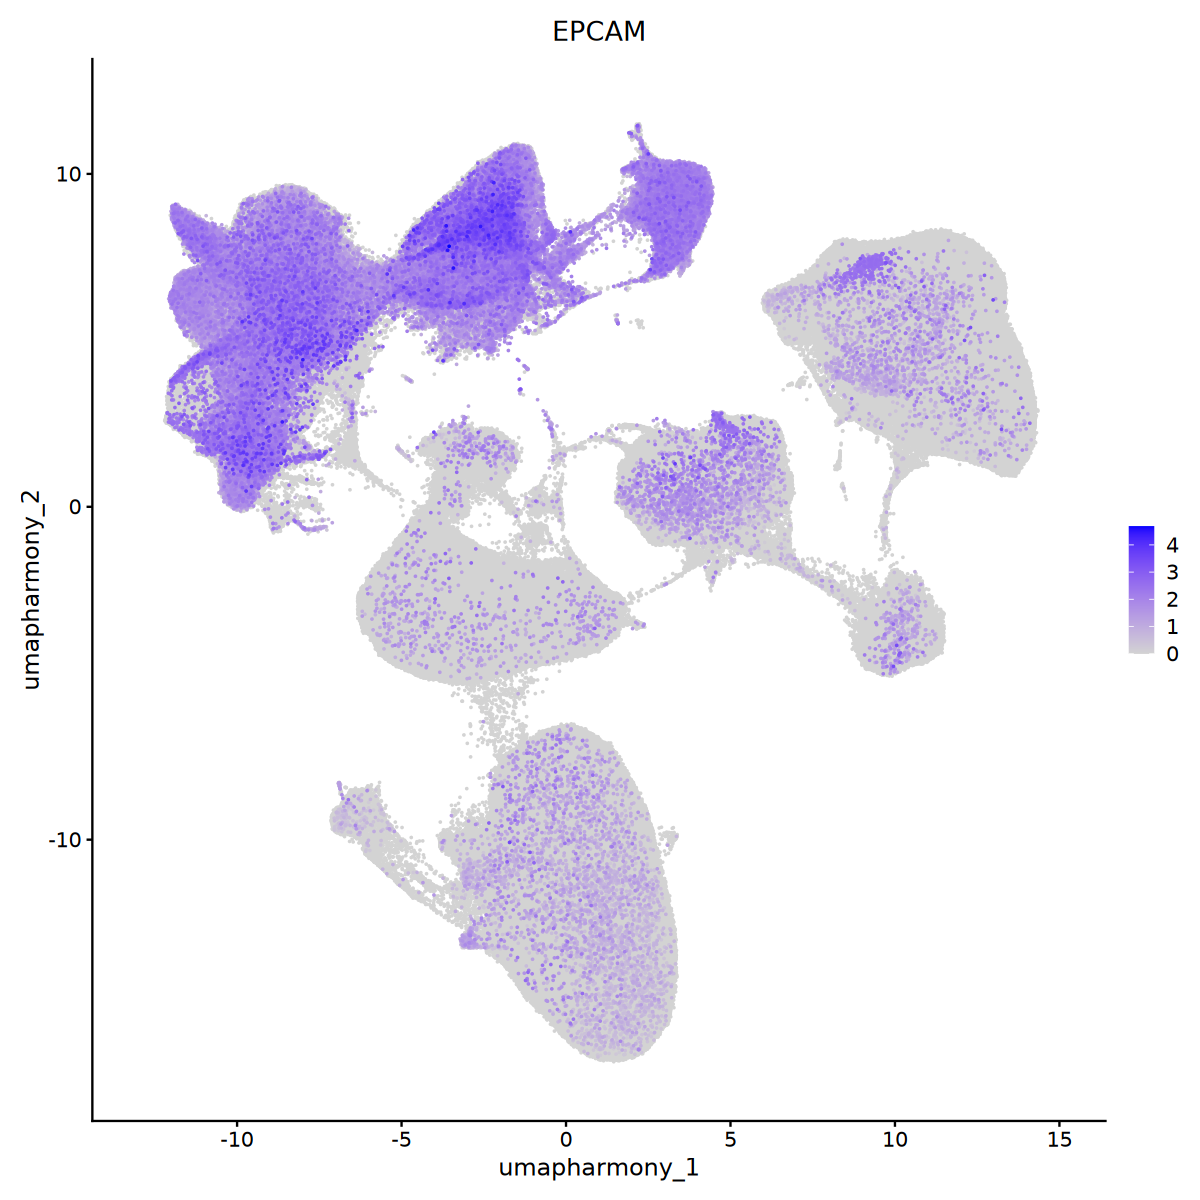

In [45]:
#Epithelial cells
options(repr.plot.height = 10, repr.plot.width = 10)
FeaturePlot(merged, features = "EPCAM", order = T, raster = F)

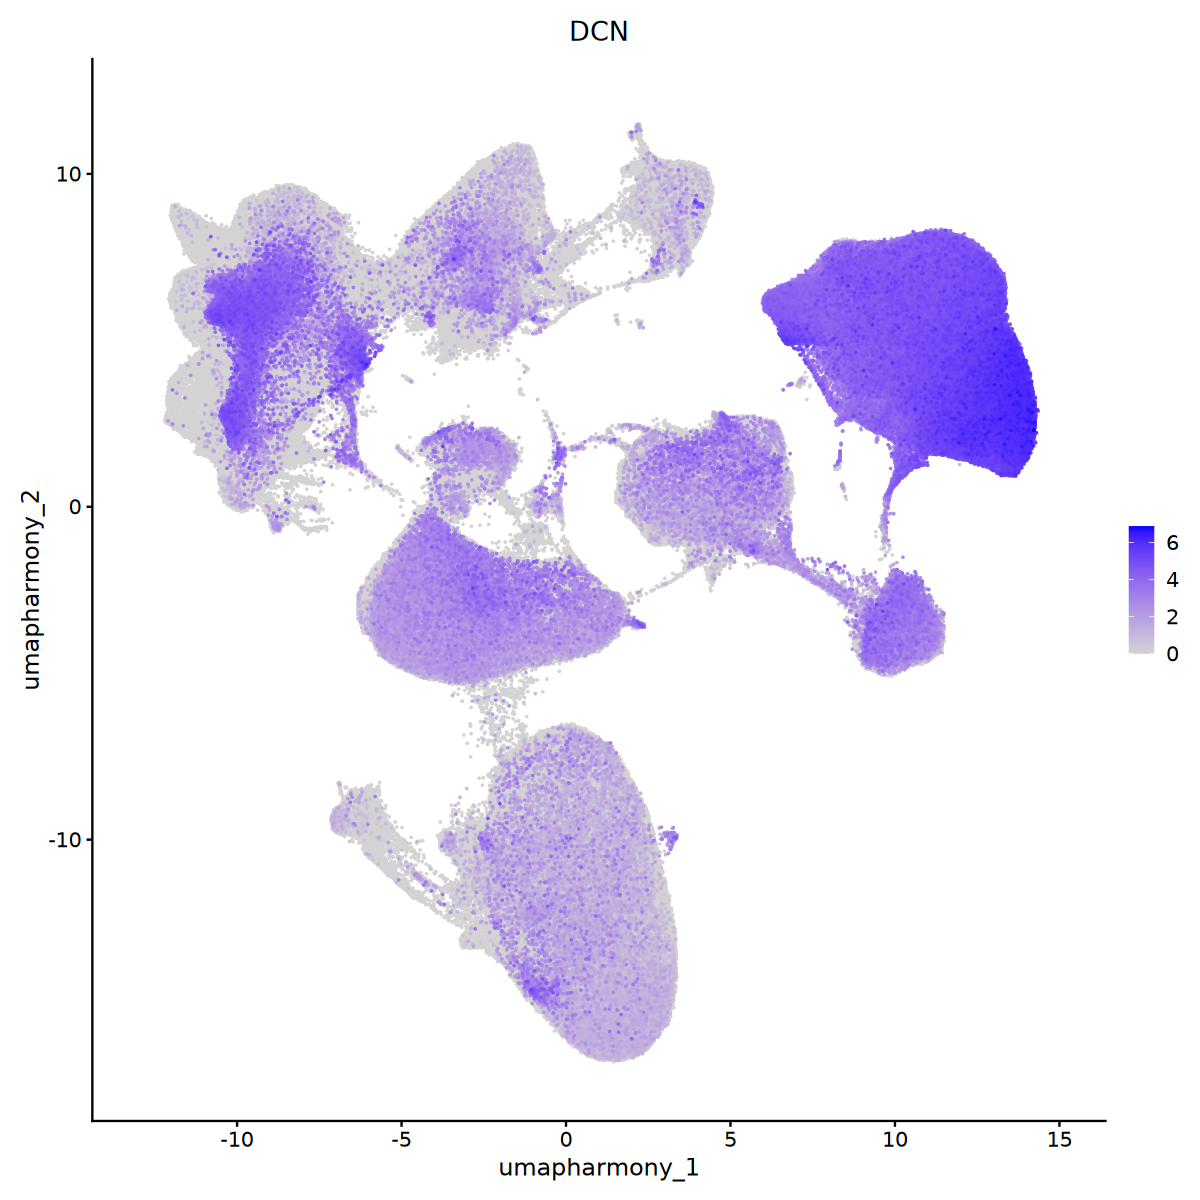

In [47]:
#Mesenchymal cells
options(repr.plot.height = 10, repr.plot.width = 10)
FeaturePlot(merged, features = "DCN", order = T, raster = F)

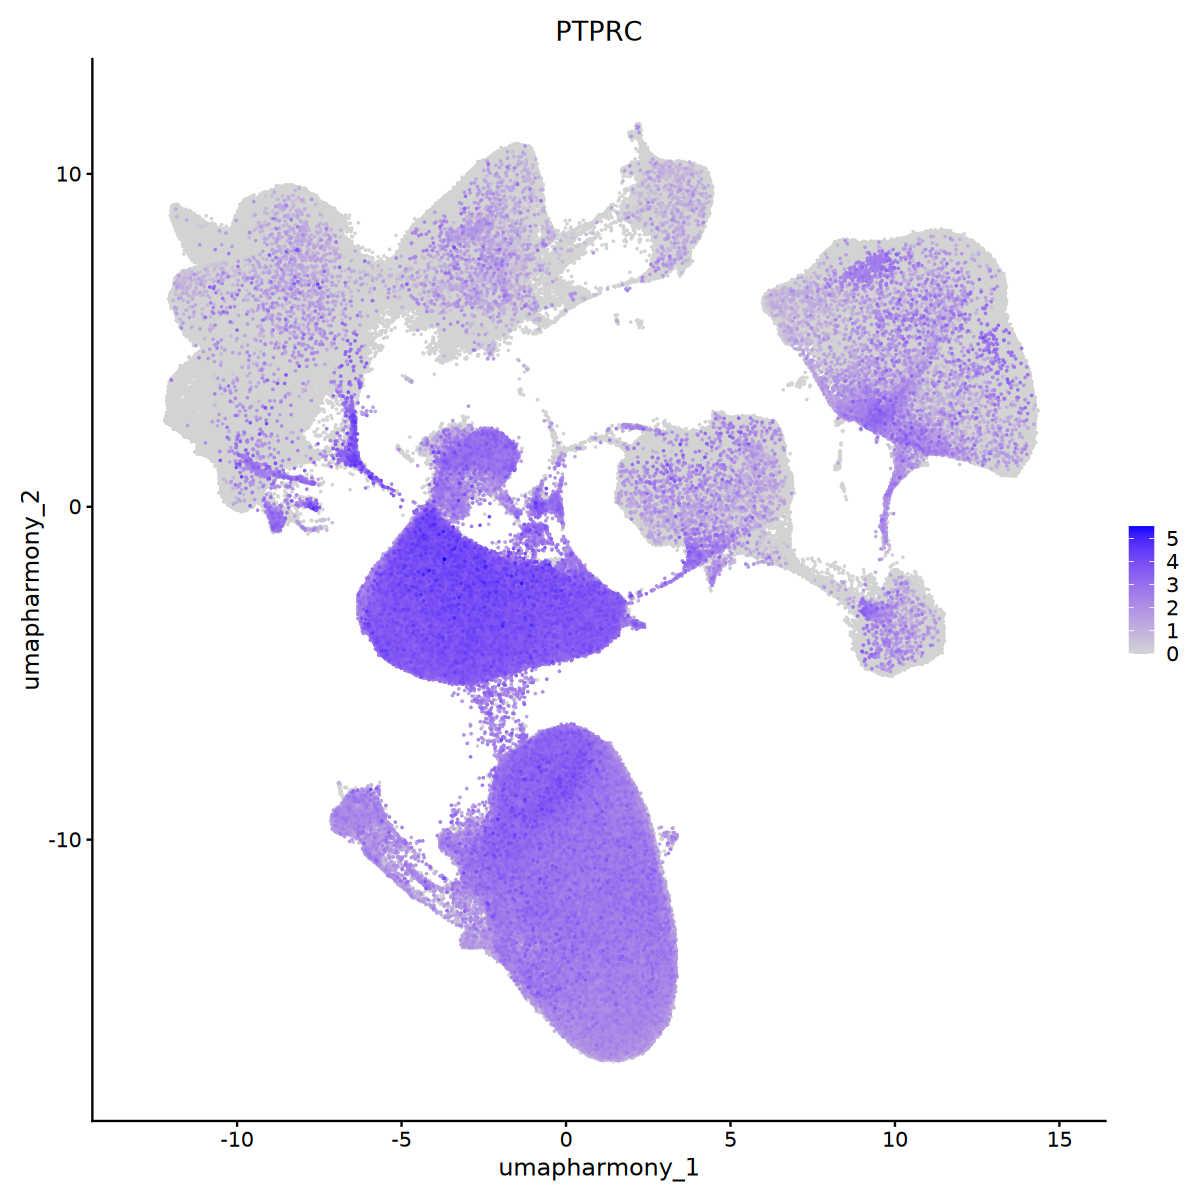

In [46]:
#Immune cells
options(repr.plot.height = 10, repr.plot.width = 10)
FeaturePlot(merged, features = "PTPRC", order = T, raster = F)

In [66]:
#Rearrange cells order
#Check the current levels of cell_identity
levels(merged$`harmony_clusters_0.2`)

# Define the desired order of factor levels
desired_order <- c("0", "1", "2", "3", "4", "5", "6", "7",
                   "8", "9", "10", "11", "12", "13", "14",
                   "15", "16", "17")

# Reorder the factor levels
merged$`harmony_clusters_0.2` <- factor(merged$`harmony_clusters_0.2`, levels = desired_order)

# Check if the factor levels have been reordered
levels(merged$`harmony_clusters_0.2`)

[1] "0"  "1"  "10" "11" "12" "13" "14" "15" "16" "17" "2"  "3"  "4"  "5"  "6" 
[16] "7"  "8"  "9"

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



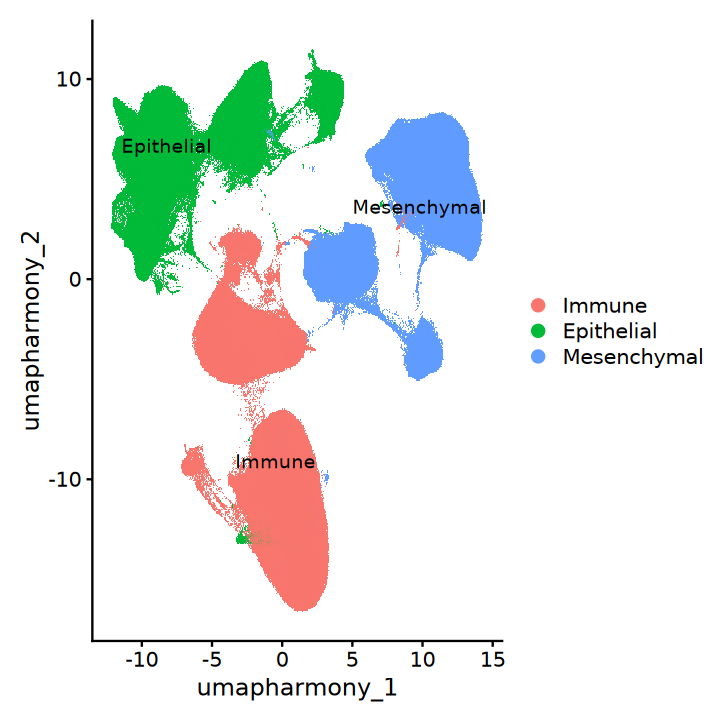

In [67]:
#Assigning new names (rough annotation)
merged$cells <- NULL
merged@active.ident <- factor(merged$`harmony_clusters_0.2`)

cluster.ids.new <- c("Immune", "Epithelial", "Immune", "Mesenchymal", "Epithelial", "Mesenchymal", "Mesenchymal", "Epithelial",
                     "Epithelial", "Mesenchymal", "Immune", "Immune", "Epithelial", "Mesenchymal", "Epithelial", "Epithelial", "Epithelial",
                     "Immune"


)

names(cluster.ids.new) <- levels(merged)
merged <- RenameIdents(merged, cluster.ids.new)
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(merged, reduction = "umap.harmony", label = TRUE)
merged$cells <- merged@active.ident

In [71]:
lineage_colors <- c(
  "Epithelial" = "#d0c3f1",
  "Immune" = "#096192",
  "Mesenchymal" = "#bc7a80"
)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



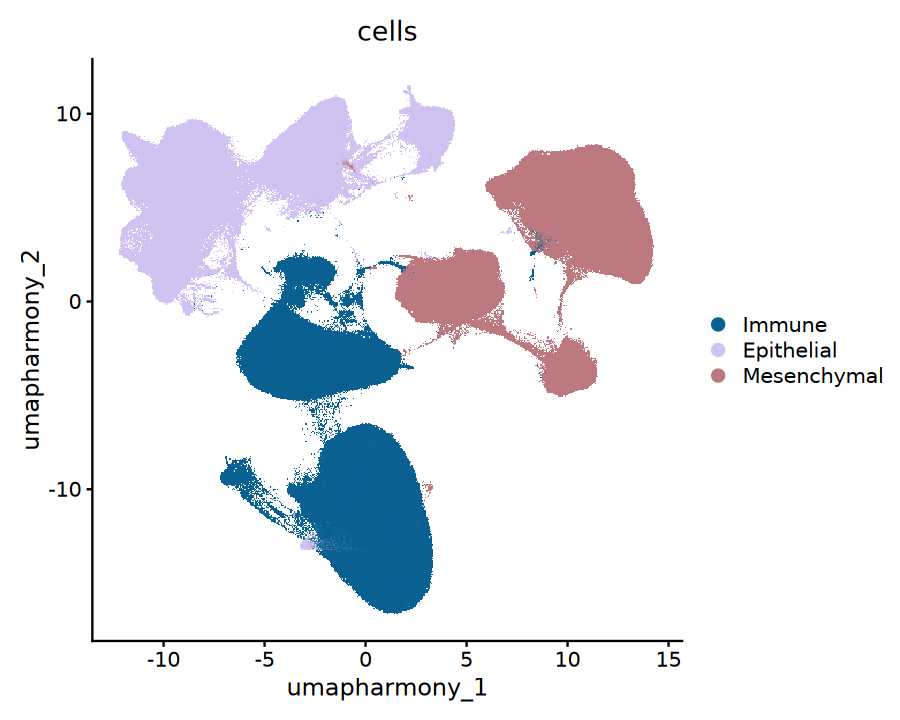

In [82]:
options(repr.plot.width=7.5, repr.plot.height=6)
DimPlot(merged, reduction = "umap.harmony", group.by = "cells",label = F, cols = lineage_colors)